In [6]:
%run my_functions.ipynb
import scipy
from sympy.stats import Exponential
from sympy import Symbol
from sympy import *

## D = 1

In [2]:
hx = [1]
hz = [[0],[-0.9],[-0.5],[0],[0.5],[0.9]]
d = [1]

In [5]:
H_b = []
H_b_dag = []

for i in range(len(hz)):
    H1 = np.array(H(hx,hz[i],d)).reshape(8,8)
    Hdag1 = np.conj(H1).T
    H_b.append(H1)
    H_b_dag.append(Hdag1)

In [6]:
e = []
psi = []
f = []
phi = []

for i in range(len(H_b)):
    e1,psi1 = np.linalg.eig(H_b[i])
    f1,phi1 = np.linalg.eig(H_b_dag[i])
    e.append(e1)
    f.append(f1)
    psi.append(psi1)
    phi.append(phi1)

/home/akash/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


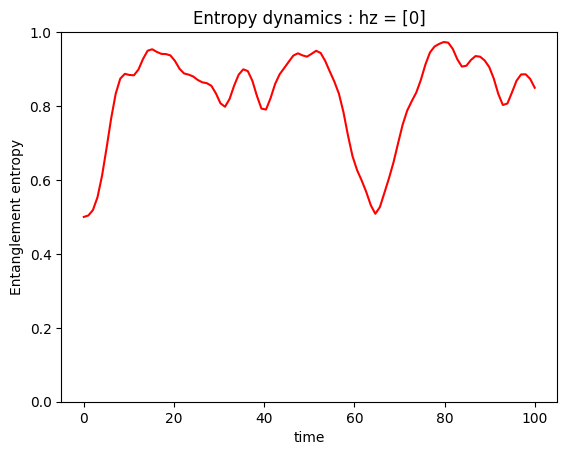

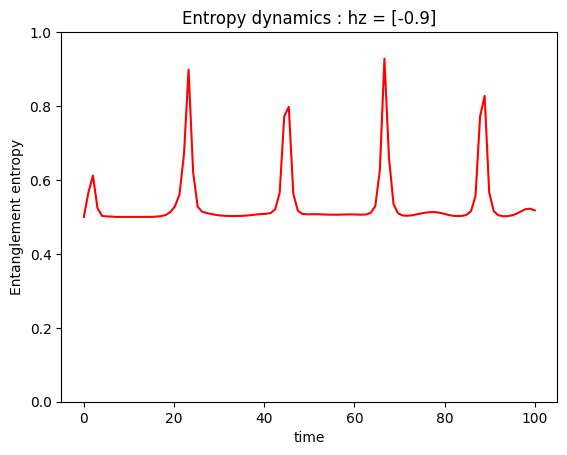

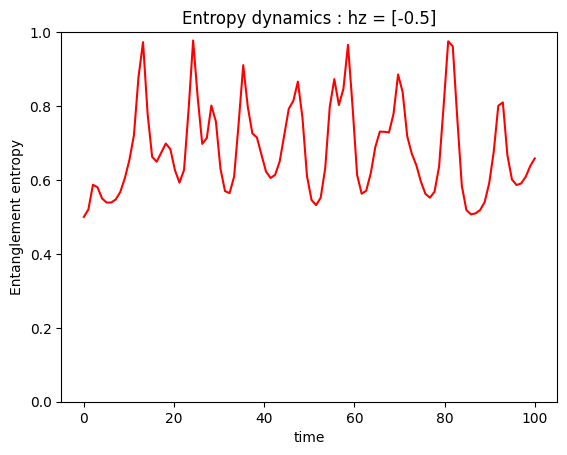

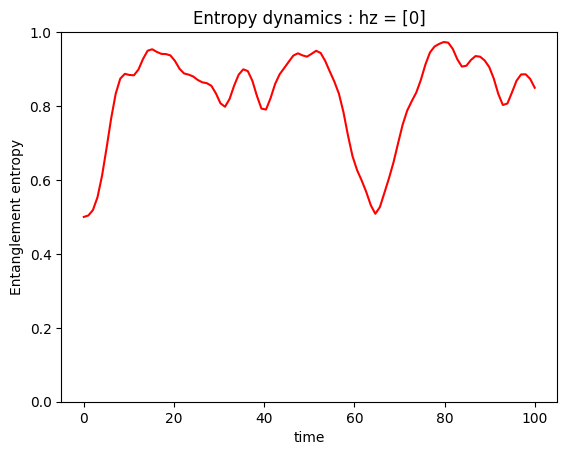

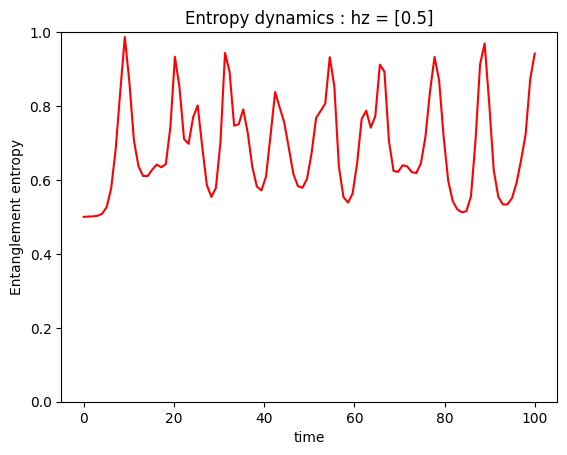

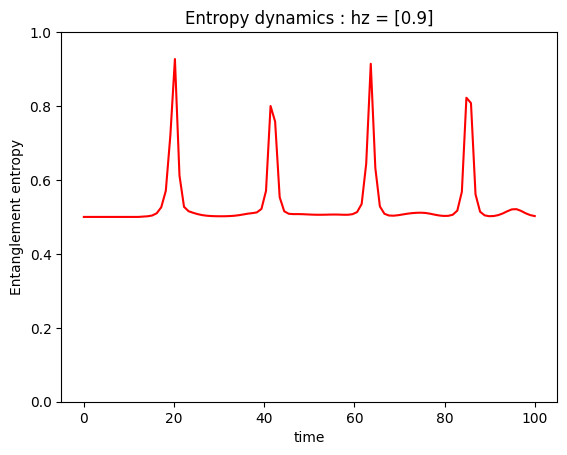

In [7]:
#Intially at t=0 let psi be |111>
ket_0 = np.array([0,1]).reshape(2,1)
ket_1 = np.array([1,0]).reshape(2,1)
psi_t0 = np.kron(ket_1,np.kron(ket_1,ket_1)).reshape(8,1)

# At time t

for k in range(len(H_b)):
    t = np.linspace(0,100,100,endpoint=True)
    S = []
    for i in range(len(t)):
        #ket_psi_t = []
        #bra_psi_t = []
        ket_psi = scipy.linalg.expm(-1j*H_b[k]*t[i])@psi_t0
        bra_psi = (np.conj(psi_t0).T)@scipy.linalg.expm(1j*H_b_dag[k]*t[i])
        N = np.sqrt(bra_psi @ ket_psi)
        #ket_psi_t.append(ket_psi/N)
        #bra_psi_t.append(bra_psi/N)
        rho = (ket_psi/N) @ (bra_psi/N)
        rdm_c = bi_rho_c(rho)
        S.append(np.round(Entropy(rdm_c),5))
    plt.plot(t,S,color='r')
    plt.title('Entropy dynamics : hz = {}'.format(hz[k]))
    plt.xlabel('time')
    plt.ylabel('Entanglement entropy')
    plt.ylim(0,1)
    plt.show()
    k+=1